In [1]:
import pyodbc, pandas as pd 

In [2]:
#Database bağlantısı oluşturma
conn = pyodbc.connect(
    "DRIVER=***"
    "SERVER=***"
    "DATABASE=***"
    "Trusted_Connection=yes;"
)

q = """
    select * from analytics.sales
    
    """

In [3]:
#data = pd.read_csv(r"C:\Users\Data Bilgisayar\Documents\ecommerce-sales-analysis\data\ecommerce_data.csv", encoding='unicode_escape')

data = pd.read_sql(q, conn)

C:\Users\Data Bilgisayar\AppData\Local\Temp\ipykernel_19060\2971069940.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(q, conn)


In [4]:
#Veri'nin ilk 5 satırı
data.head(5)

,SalesID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsReturn,TotalAmount
0,1,539484,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-19 15:44:00,0.55,15640.0,United Kingdom,0,13.2
1,2,539484,22956,36 FOIL HEART CAKE CASES,3,2010-12-19 15:44:00,2.10,15640.0,United Kingdom,0,6.3
2,3,539484,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,6,2010-12-19 15:44:00,2.95,15640.0,United Kingdom,0,17.7
3,4,539484,22941,CHRISTMAS LIGHTS 10 REINDEER,1,2010-12-19 15:44:00,8.50,15640.0,United Kingdom,0,8.5
4,5,539484,84375,SET OF 20 KIDS COOKIE CUTTERS,12,2010-12-19 15:44:00,2.10,15640.0,United Kingdom,0,25.2


In [5]:
#Satır ve sütun sayısı
data.shape

(541909, 11)

In [6]:
data.info

<bound method DataFrame.info of         SalesID InvoiceNo StockCode                         Description  \
0             1    539484     22952     60 CAKE CASES VINTAGE CHRISTMAS   
1             2    539484     22956            36 FOIL HEART CAKE CASES   
2             3    539484     22910   PAPER CHAIN KIT VINTAGE CHRISTMAS   
3             4    539484     22941        CHRISTMAS LIGHTS 10 REINDEER   
4             5    539484     84375       SET OF 20 KIDS COOKIE CUTTERS   
...         ...       ...       ...                                 ...   
541904   541905    539484     22931  BAKING MOULD HEART WHITE CHOCOLATE   
541905   541906    539484     22930   BAKING MOULD HEART MILK CHOCOLATE   
541906   541907    539484     22937     BAKING MOULD CHOCOLATE CUPCAKES   
541907   541908    539484     22961              JAM MAKING SET PRINTED   
541908   541909    539484     84378       SET OF 3 HEART COOKIE CUTTERS   

        Quantity         InvoiceDate  UnitPrice  CustomerID        

In [7]:
#Sütunlar
data.columns

Index(['SalesID', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'IsReturn',
       'TotalAmount'],
      dtype='object')

In [8]:
#Boş değerler
data.isnull().sum()

SalesID             0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
IsReturn            0
TotalAmount         0
dtype: int64

In [9]:
#Veriyi df içine kopyalıyoruz.
df = data.copy()

In [10]:
#Boş değerleri doldurma
df['CustomerID'] = df['CustomerID'].fillna("Unknown")  # -1 veya Unknown gibi işaret

In [11]:
df['Description'] = df['Description'].fillna("No Description")

In [12]:
#Quantity sütunundaki min ve max değerler
df['Quantity'].min(), df['Quantity'].max()

(-80995, 80995)

In [13]:
#Quantity sütunundaki 0 dan küçük değerler(iadeler)
(df['Quantity'] < 0).sum()

10624

In [14]:
#Quantity sütunundaki 0 dan büyük değerler
(df['Quantity'] > 0).sum()

531285

In [15]:
#İadeleri başka sütuna kaydetme
df["IsReturn"] = df['Quantity'] < 0

In [16]:
# 0 değerleri kaldırma
df = df[df['Quantity'] > 0]

In [17]:
(df['Quantity'] == 0).sum()

0

In [18]:
# UnitPrice sütunundaki min ve max değerler
df['UnitPrice'].min(), df['UnitPrice'].max()

(-11062.06, 13541.33)

In [19]:
# UnitPrice sütunundaki 0 değerler
(df['UnitPrice'] == 0).sum()

1183

In [20]:
# 0 değerlerin kaldırılması
df = df[df['UnitPrice'] > 0]

In [21]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

total_sales = df['TotalAmount'].sum().round(2)
print("Toplam satış hacmi:", total_sales)

Toplam satış hacmi: 10666684.54


In [22]:
# InvoiceDate sütununu datetime çevirme
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)

In [23]:
#Günlük satışlar
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalAmount'].sum()
print(daily_sales.head())

InvoiceDate
2010-12-01    58960.79
2010-12-02    47748.38
2010-12-03    46943.71
2010-12-05    31774.95
2010-12-06    54830.46
Name: TotalAmount, dtype: float64


In [24]:
#Aylık satışlar 
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalAmount'].sum().sort_index()
print(monthly_sales)

InvoiceDate
2010-12     823746.14
2011-01     691364.56
2011-02     523631.89
2011-03     717639.36
2011-04     537808.62
2011-05     770536.02
2011-06     761739.90
2011-07     719221.19
2011-08     759138.38
2011-09    1058590.17
2011-10    1154979.30
2011-11    1509496.33
2011-12     638792.68
Freq: M, Name: TotalAmount, dtype: float64


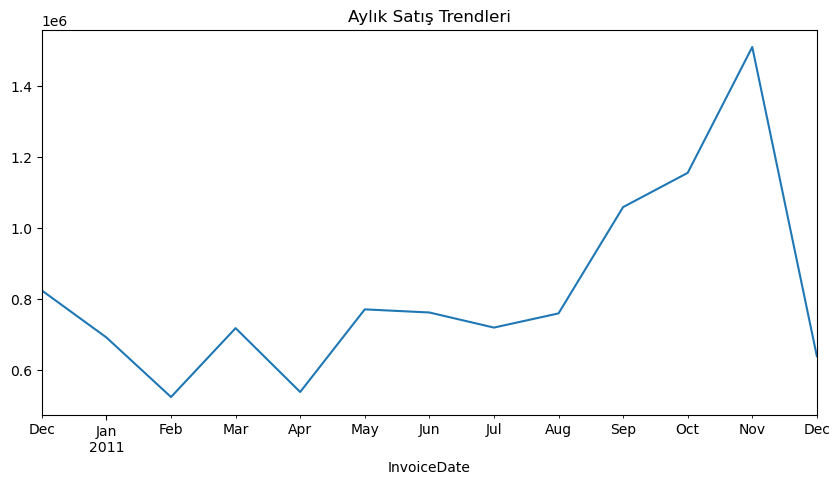

In [25]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', figsize=(10,5), title="Aylık Satış Trendleri")
plt.show()


In [26]:
# Aralık ayı satışları
december_sales = df[df['InvoiceDate'].dt.month == 12].groupby(df['InvoiceDate'].dt.year)['TotalAmount'].sum()
print("Aralık Ayı Satışları",december_sales)

Aralık Ayı Satışları InvoiceDate
2010    823746.14
2011    638792.68
Name: TotalAmount, dtype: float64


In [27]:
#Kaç farklı ürün satılmış?
unique_products = df['StockCode'].nunique()
print("Toplam farklı ürün sayısı:", unique_products)

Toplam farklı ürün sayısı: 3921


In [28]:
#En çok satılan ürünler:
top_products = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: TotalAmount, dtype: float64


In [29]:
#En çok satılan ürünler(adet):
top_products_qty = (
    df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
)

print(top_products_qty)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64


In [30]:
#Ortalama ürün fiyatı
avg_price = df['UnitPrice'].mean().round(2)
print('Ortalama ürün fiyatı: ', avg_price)

Ortalama ürün fiyatı:  3.91


In [31]:
#Toplam ürün sayısı
total_product = df['Description'].count()
print("Toplam ürün sayısı: ", total_product)

Toplam ürün sayısı:  530100


In [32]:
#Pareto Analizi (80/20) kuralı
#Ürünleri cirolarına göre sıralayıp, toplam satışın %80'ini sağlayan %20'lik kısmı bulmak.

#Ürün bazlı toplam gelir
product_revenue = df.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False)

#Kümülatif yüzde hesapla
cum_percent = product_revenue.cumsum() / product_revenue.sum()*100

#Pareto serisi(ilk %80'lik kısmı sağlayan ürünler)
pareto_products = cum_percent[cum_percent <= 80]
print("Satışların %80'ini sağlayan ürün sayısı: ", pareto_products.shape[0])


Satışların %80'ini sağlayan ürün sayısı:  827


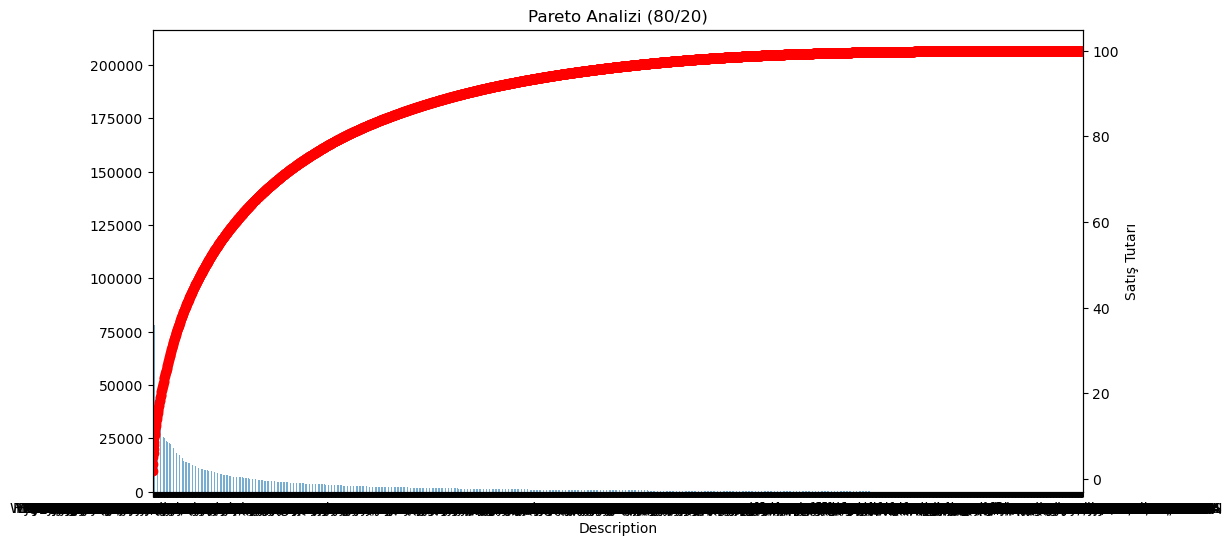

In [33]:
#Mavi sütunlar: Ürünlerin satış tutarı
#Kırmızı çizgi: Pareto eğrisi
plt.figure(figsize=(12,6))
product_revenue.plot(kind='bar', alpha=0.6)
cum_percent.plot(secondary_y=True, color='red', marker='o')
plt.title("Pareto Analizi (80/20)")
plt.ylabel("Satış Tutarı")
plt.show()

In [34]:
#Satış başına ortalama harcama
unique_customers = df['CustomerID'].nunique()
print("Farklı müşteri sayısı:", unique_customers)

Farklı müşteri sayısı: 4339


In [35]:
import datetime as dt

# Veri kümesinin en güncel tarihini bul
latest_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM hesaplama
rfm = (df.groupby('CustomerID')
         .agg({
             'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
             'InvoiceNo': 'nunique',                                 # Frequency
             'TotalAmount': 'sum'                                    # Monetary
         })
         .rename(columns={
             'InvoiceDate': 'Recency',
             'InvoiceNo': 'Frequency',
             'TotalAmount': 'Monetary'
         }))


In [36]:
# Recency: küçük değer daha iyi → ters skor
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
# Frequency: büyük değer daha iyi
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
# Monetary: büyük değer daha iyi
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [37]:
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].astype(int).sum(axis=1)

In [38]:
def segment(r, f, m):
    if r >= 4 and f >= 4 and m >= 4:
        return "Sadık Müşteri"
    elif r >= 4 and f <= 2:
        return "Yeni Müşteri"
    elif r <= 2 and f >= 4:
        return "Riskte Müşteri"
    else:
        return "Orta Seviye"

rfm['Segment'] = rfm.apply(lambda x: segment(x['R_Score'], x['F_Score'], x['M_Score']), axis=1)

In [39]:
print(rfm.head())
print(rfm.describe())

            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment  \
CustomerID                                                                     
12346.0         326          1  77183.60       1       1       5         115   
12347.0           2          7   4310.00       5       5       5         555   
12348.0          75          4   1797.24       2       4       4         244   
12349.0          19          1   1757.55       4       1       4         414   
12350.0         310          1    334.40       1       1       2         112   

            RFM_Score         Segment  
CustomerID                             
12346.0             7     Orta Seviye  
12347.0            15   Sadık Müşteri  
12348.0            10  Riskte Müşteri  
12349.0             9    Yeni Müşteri  
12350.0             4     Orta Seviye  
           Recency    Frequency      Monetary    RFM_Score
count  4339.000000  4339.000000  4.339000e+03  4339.000000
mean     92.515326     4.600138  2.458328

In [40]:
rfm.loc[12346]   # örnek CustomerID

Recency                326
Frequency                1
Monetary           77183.6
R_Score                  1
F_Score                  1
M_Score                  5
RFM_Segment            115
RFM_Score                7
Segment        Orta Seviye
Name: 12346.0, dtype: object

In [41]:
segment_counts = rfm['Segment'].value_counts()
print(segment_counts)

Segment
Orta Seviye       2781
Sadık Müşteri      963
Yeni Müşteri       320
Riskte Müşteri     275
Name: count, dtype: int64


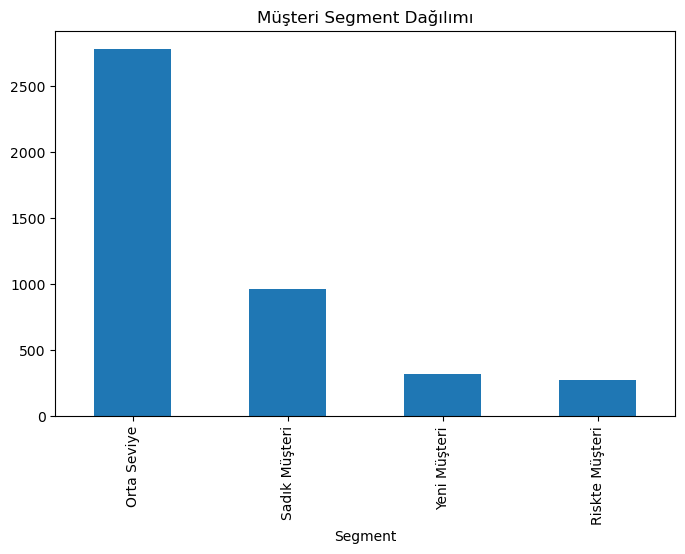

In [42]:
import matplotlib.pyplot as plt

segment_counts.plot(kind='bar', figsize=(8,5), title="Müşteri Segment Dağılımı")
plt.show()


In [43]:
print("Müşteri sayısı:", rfm.shape[0])
print("****************************************************************")
print(rfm.groupby('Segment')[['Recency','Frequency','Monetary']].mean())
print("****************************************************************")
print(rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False))

Müşteri sayısı: 4339
****************************************************************
                   Recency  Frequency     Monetary
Segment                                           
Orta Seviye     124.216109   2.204243   906.948346
Riskte Müşteri  137.076364   4.890909  1575.407236
Sadık Müşteri    12.849429  12.551402  7855.262420
Yeni Müşteri     18.465625   1.243750   458.145281
****************************************************************
Segment
Sadık Müşteri     7564617.71
Orta Seviye       2522223.35
Riskte Müşteri     433236.99
Yeni Müşteri       146606.49
Name: Monetary, dtype: float64


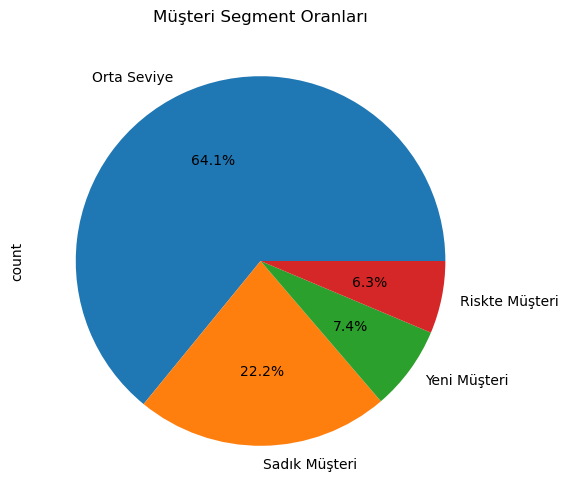

In [44]:
rfm['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Müşteri Segment Oranları")
plt.show()

In [45]:
#En çok satış yapan ülkeler(sipariş sayısı)
top_countries_orders = (
    df.groupby('Country')['InvoiceNo']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

print(top_countries_orders)

Country
United Kingdom    18019
Germany             457
France              392
EIRE                288
Belgium              98
Netherlands          94
Spain                90
Portugal             58
Australia            57
Switzerland          54
Name: InvoiceNo, dtype: int64


In [46]:
#Gelir dağılımı(ciroya göre)
top_countries_revenue = (
    df.groupby('Country')['TotalAmount']
    .sum()
    .sort_values(ascending=False)
)

print(top_countries_revenue)

Country
United Kingdom          9025222.08
Netherlands              285446.34
EIRE                     283453.96
Germany                  228867.14
France                   209715.11
Australia                138521.31
Spain                     61577.11
Switzerland               57089.90
Belgium                   41196.34
Sweden                    38378.33
Japan                     37416.37
Norway                    36165.44
Portugal                  33747.10
Finland                   22546.08
Singapore                 21279.29
Channel Islands           20450.44
Denmark                   18955.34
Italy                     17483.24
Hong Kong                 15691.80
Cyprus                    13590.38
Austria                   10198.68
Israel                     8135.26
Poland                     7334.65
Greece                     4760.52
Unspecified                4749.79
Iceland                    4310.00
Canada                     3666.38
USA                        3580.39
Malta       

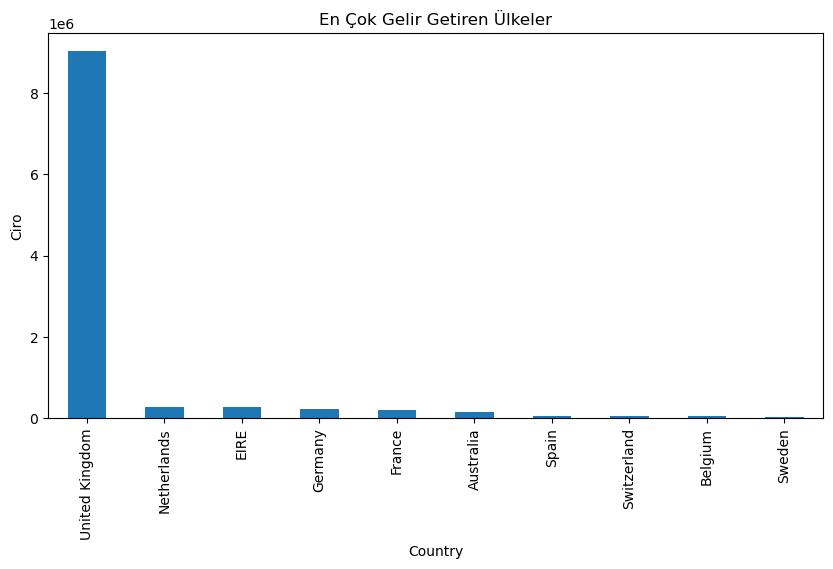

In [47]:
top_countries_revenue.head(10).plot(kind='bar', figsize=(10,5), title="En Çok Gelir Getiren Ülkeler")
plt.ylabel("Ciro")
plt.show()

In [48]:
total_revenue = df['TotalAmount'].sum()
uk_revenue = df[df['Country'] == 'United Kingdom']['TotalAmount'].sum()
intl_revenue = total_revenue - uk_revenue

uk_ratio = uk_revenue / total_revenue * 100
intl_ratio = intl_revenue / total_revenue * 100

print(f"UK Satış Oranı: %{uk_ratio:.2f}")
print(f"Uluslararası Satış Oranı: %{intl_ratio:.2f}")

UK Satış Oranı: %84.61
Uluslararası Satış Oranı: %15.39


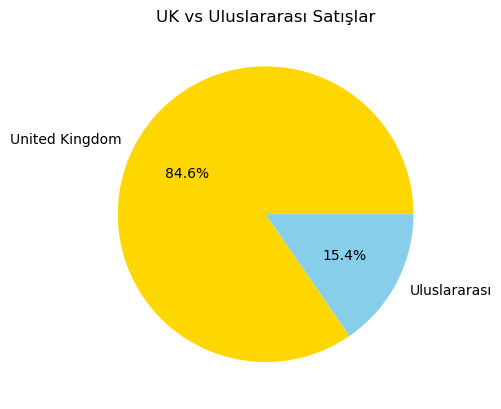

In [49]:
plt.pie([uk_revenue, intl_revenue],
        labels=['United Kingdom', 'Uluslararası'],
        autopct='%1.1f%%',
        colors=['gold','skyblue'])
plt.title("UK vs Uluslararası Satışlar")
plt.show()

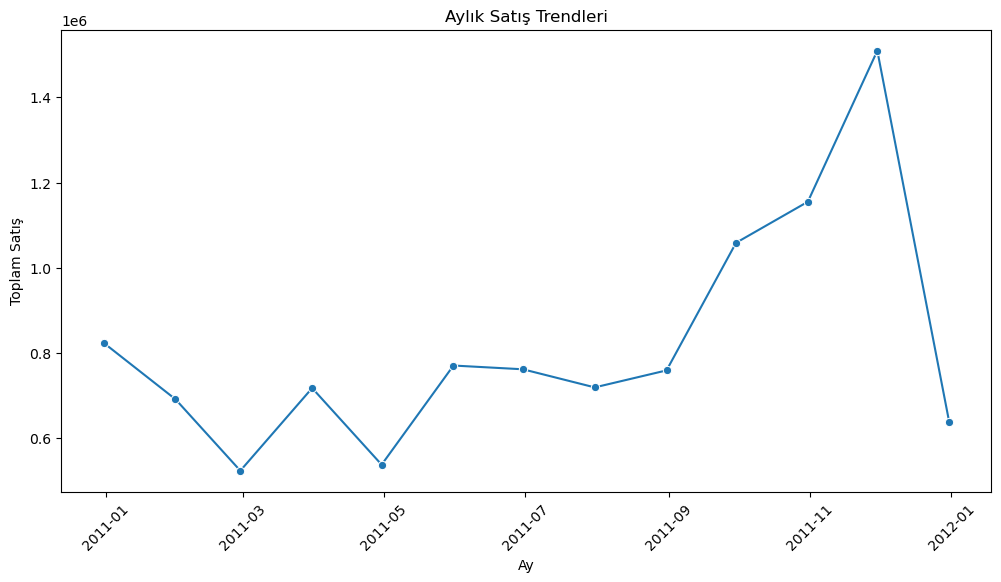

In [50]:
import seaborn as sns

monthly_sales = (
    df.set_index('InvoiceDate')
      .resample('M')['TotalAmount']
      .sum()
)

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Aylık Satış Trendleri")
plt.xlabel("Ay")
plt.ylabel("Toplam Satış")
plt.xticks(rotation=45)
plt.show()

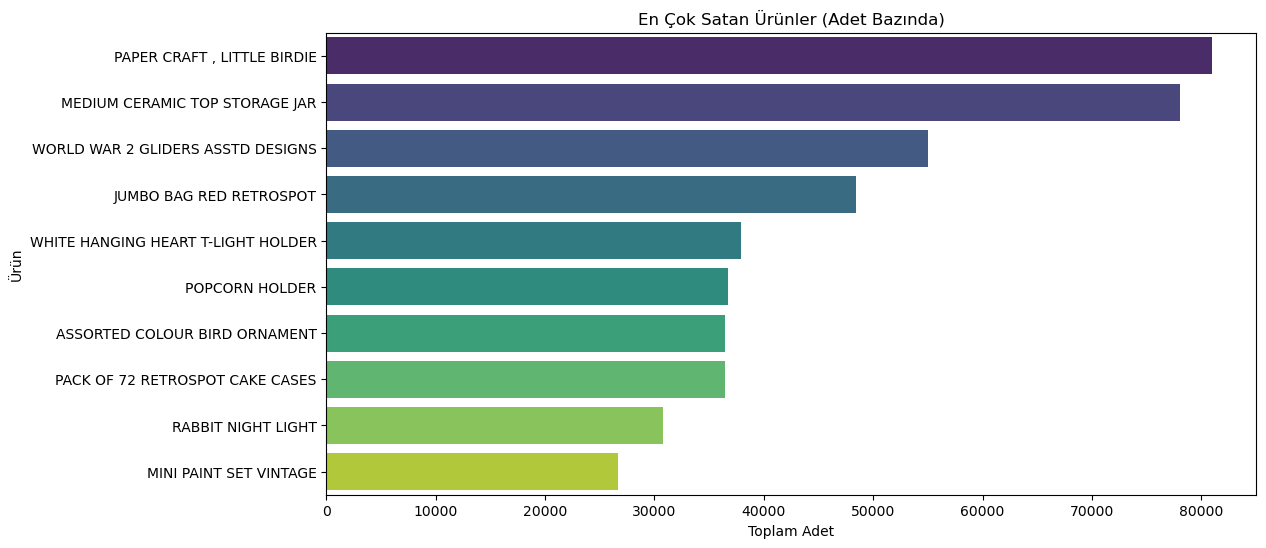

In [51]:
top_products = (
    df.groupby('Description')['Quantity']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("En Çok Satan Ürünler (Adet Bazında)")
plt.xlabel("Toplam Adet")
plt.ylabel("Ürün")
plt.show()

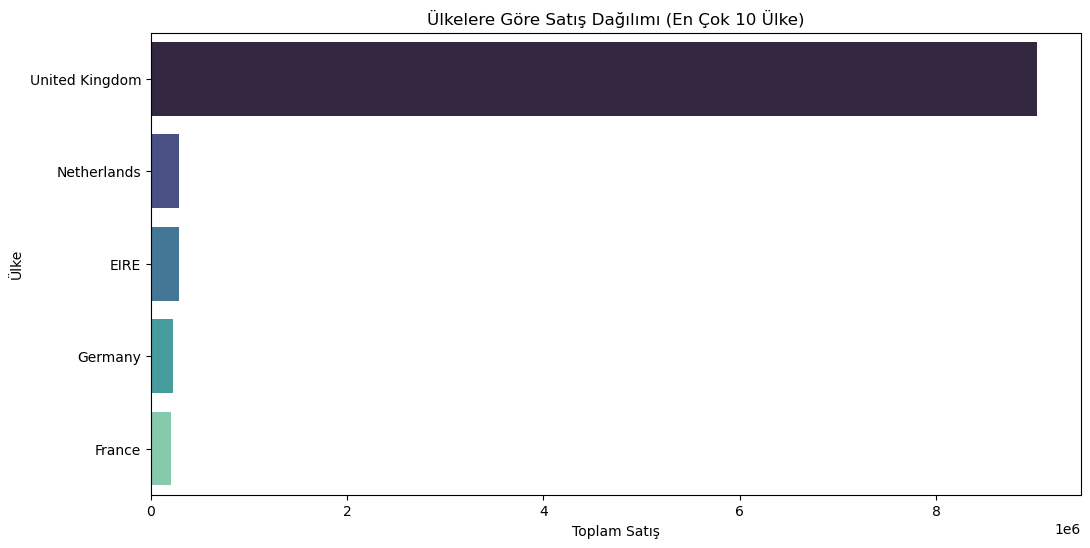

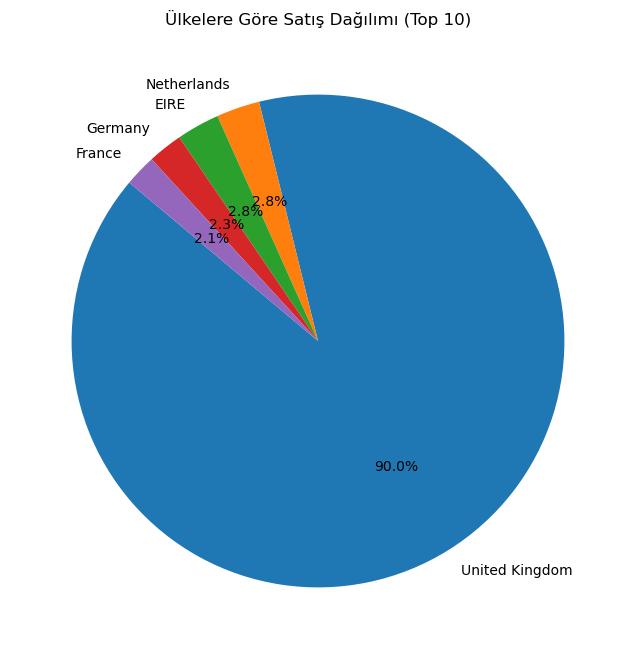

In [52]:
top_countries = (
    df.groupby('Country')['TotalAmount']
      .sum()
      .sort_values(ascending=False)
      .head(5)
)

# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
plt.title("Ülkelere Göre Satış Dağılımı (En Çok 10 Ülke)")
plt.xlabel("Toplam Satış")
plt.ylabel("Ülke")
plt.show()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title("Ülkelere Göre Satış Dağılımı (Top 10)")
plt.show()


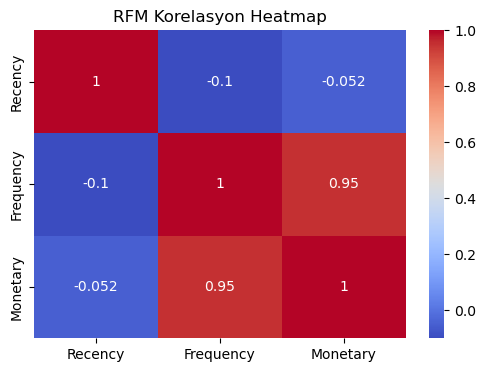

In [53]:
rfm = rfm[['Recency','Frequency','Monetary','R_Score','F_Score','M_Score','Segment']]

plt.figure(figsize=(6,4))
sns.heatmap(rfm[['Recency','Frequency','Monetary']].corr(), annot=True, cmap="coolwarm")
plt.title("RFM Korelasyon Heatmap")
plt.show()


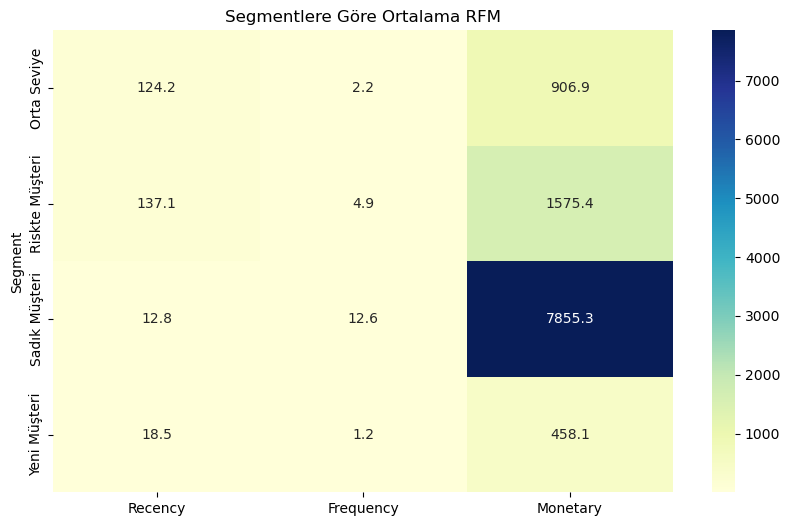

In [54]:
rfm_segment_avg = rfm.groupby('Segment')[['Recency','Frequency','Monetary']].mean()

plt.figure(figsize=(10,6))
sns.heatmap(rfm_segment_avg, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Segmentlere Göre Ortalama RFM")
plt.show()

In [55]:
#Keşifsel Zaman Serisi Analizi

monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalAmount'].sum()
monthly_sales = monthly_sales.to_timestamp()

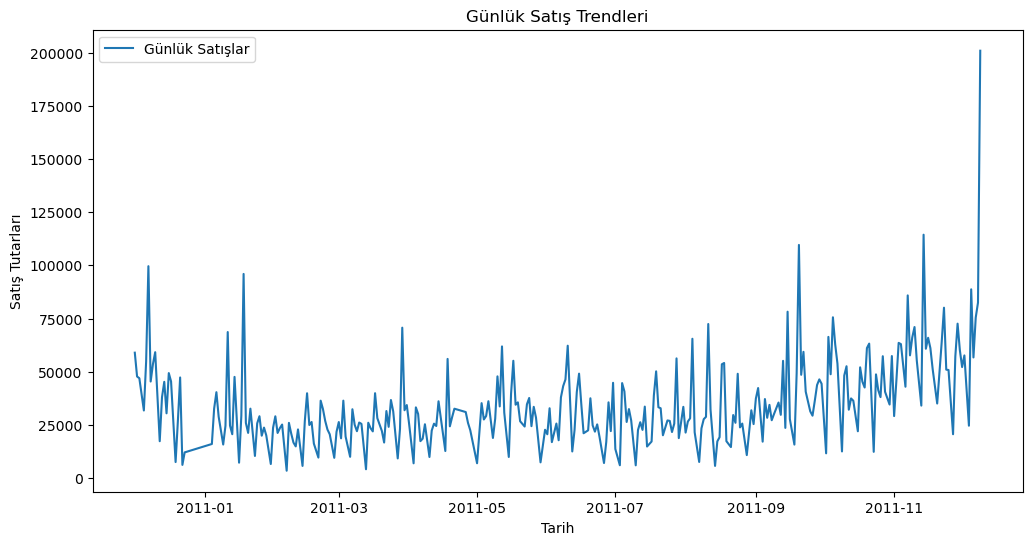

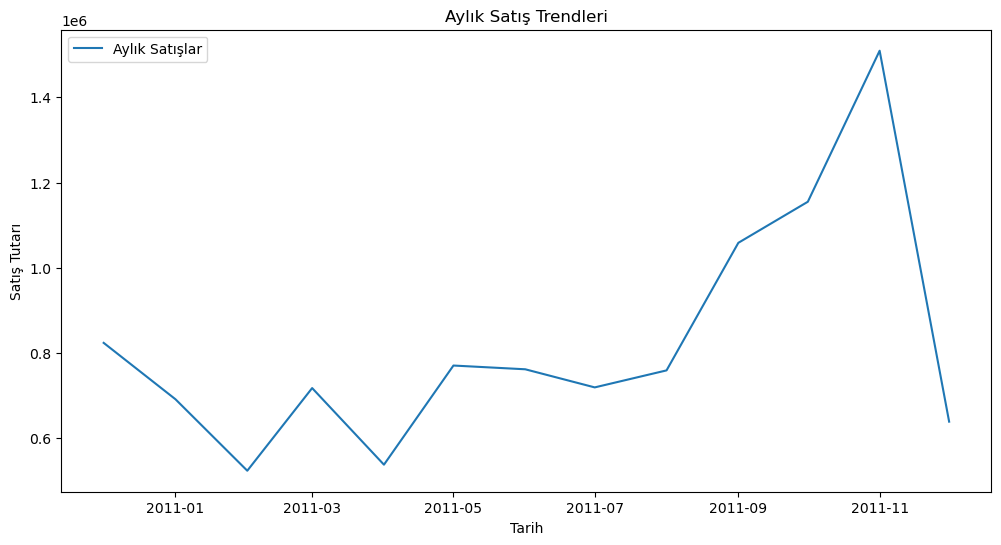

In [56]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values, label = 'Günlük Satışlar')
plt.title('Günlük Satış Trendleri')
plt.xlabel('Tarih')
plt.ylabel('Satış Tutarları')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, label = 'Aylık Satışlar')
plt.title('Aylık Satış Trendleri')
plt.xlabel('Tarih')
plt.ylabel('Satış Tutarı')
plt.legend()
plt.show()

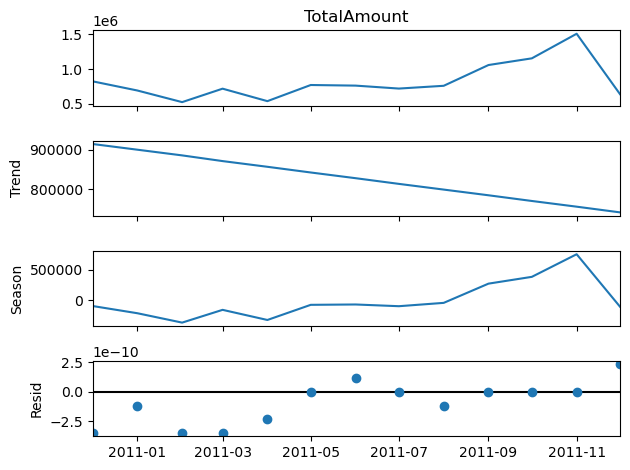

In [57]:
from statsmodels.tsa.seasonal import STL

monthly_sales = monthly_sales.asfreq('MS')      # düzenli aylık indeks
monthly_sales = monthly_sales.fillna(0)         # ya da uygun imputasyon
stl = STL(monthly_sales, period=12, robust=True)
res = stl.fit()
res.plot()
plt.show()

In [58]:
Q1 = daily_sales.quantile(0.25)
Q3 = daily_sales.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = daily_sales[(daily_sales < lower_bound) | (daily_sales > upper_bound)]
print(outliers)


InvoiceDate
2010-12-07     99618.20
2011-01-18     95978.05
2011-09-20    109612.03
2011-11-07     85881.81
2011-11-14    114419.89
2011-11-23     80104.18
2011-12-05     88741.96
2011-12-08     82495.00
2011-12-09    200920.60
Name: TotalAmount, dtype: float64


In [59]:
import numpy as np

z_scores = (daily_sales - daily_sales.mean()) / daily_sales.std()
outliers_z = daily_sales[np.abs(z_scores) > 3]
print(outliers_z)


InvoiceDate
2010-12-07     99618.20
2011-09-20    109612.03
2011-11-14    114419.89
2011-12-09    200920.60
Name: TotalAmount, dtype: float64


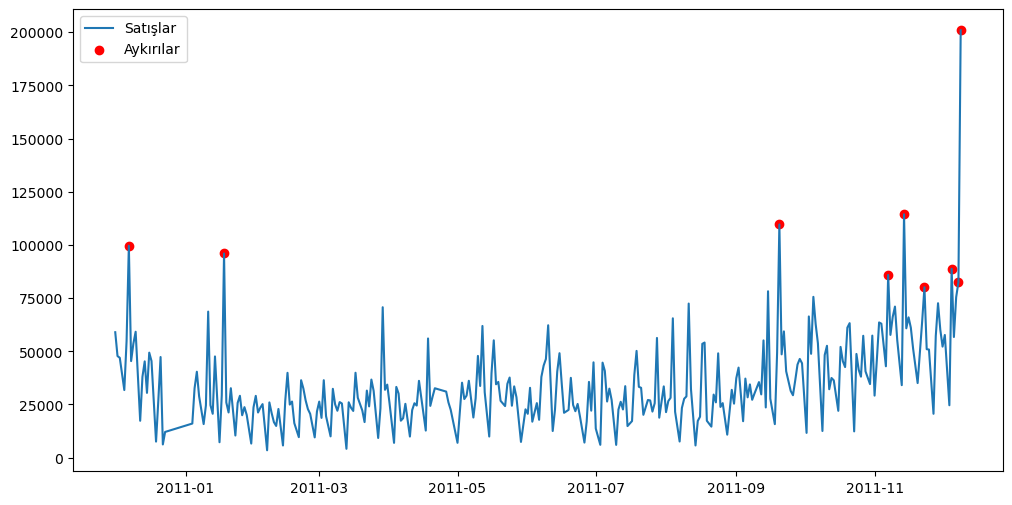

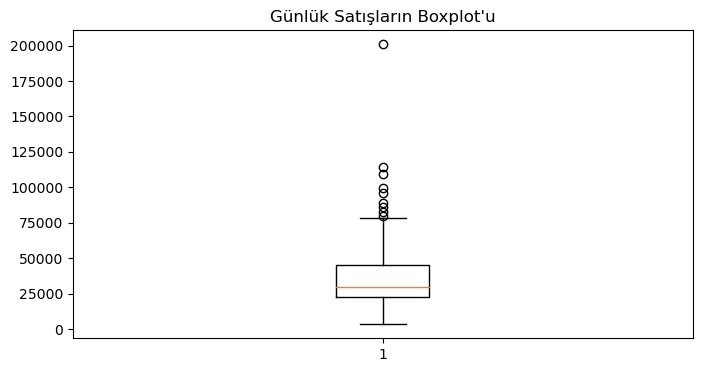

In [60]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values, label="Satışlar")
plt.scatter(outliers.index, outliers.values, color="red", label="Aykırılar")
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(8,4))
plt.boxplot(daily_sales.values)
plt.title("Günlük Satışların Boxplot'u")
plt.show()


In [61]:
daily_sales_diff = daily_sales.diff().dropna()

from statsmodels.tsa.stattools import adfuller
result = adfuller(daily_sales_diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -6.385461382408398
p-value: 2.1698114554441466e-08
